![](forest-fire.jpeg)

## Εισαγωγή

Image by <a href="https://pixabay.com/users/ylvers-337353/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=432870" data-bcup-haslogintext="no">Ylvers</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=432870" data-bcup-haslogintext="no">Pixabay</a>


Ένα ακόμη καλοκαίρι έχει φτάσει στο τέλος του. Η Ελλάδα καλείται άλλη μια φορά να αξιολογήσει τις ζημιές που προκάλεσαν οι πυρκαγιές στον φυσικό της πλούτο, τις οικονομικές ζημίες σε καλλιέργειες, και το σημαντικότερο η τραγική απώλεια ανθρώπων και ζώων.

Στην ιστοσελίδα του Πυροσβεστικού Σώματος Ελλάδος [https://www.fireservice.gr](https://www.fireservice.gr/el_GR/synola-dedomenon) μπορείτε να βρείτε αρχεία δασικών και αστικών συμβάντων στα οποία κλήθηκε να επέμβει το Π.Σ. από το 2000 - 2021 σε μορφή `.xls|.xlsx`. Για την δημιουργία των γραφημάτων χρειάστηκε να επεξεργαστώ τα αρχεία excel μέσω της python, να επιδιορθώσω κάποιες τιμές και να αποθηκεύσω τα δεδομένα σε ένα αρχείο με όνομα `wildfires.csv`. Σε [αυτή την σελίδα](helper.ipynb) μπορείτε να δείτε με λεπτομέρειες την προεργασία. Παρακάτω ακουλουθεί ένα μικρό δείγμα των δεδομένων.

In [1]:
# Εισαγωγή των βιβλιοθηκών
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
sns.set_theme(style='whitegrid', context='talk', palette='colorblind')

wildfires = pd.read_csv('datasets/wildfires.csv', parse_dates=['start', 'end'], low_memory=False)
wildfires.sample(5)

,fire_service,forest_department,location,district,start_date,start_time,end_date,end_time,forest,forest_area,...,private_trucks,other_trucks,helicopters,canadair_new,canadair_old,pzl,gru,address,longitude,latitude
44867,Π.Κ. ΚΑΛΛΟΝΗΣ,NaN,Δ. ΕΡΕΣΣΟΥ,ΛΕΣΒΟΥ,2003-10-08,11:00:00,2003-10-08,17:30:00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69061,Π.Υ. ΓΙΑΝΝΙΤΣΩΝ,ΕΔΕΣΣΑΣ,ΤΣΑΙΝΑΡΛΙ,ΠΕΛΛΑΣ,2006-09-11,12:34:00,2006-09-11,13:20:00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119667,Π.Υ. ΠΤΟΛΕΜΑΙΔΑΣ,ΚΟΖΑΝΗΣ,Τ.Κ. ΚΑΡΥΟΧΩΡΙΟΥ,ΚΟΖΑΝΗΣ,2011-07-13,18:50,2011-07-13,20:25,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
197397,Π.Υ. ΠΑΛΑΜΑ,ΚΑΡΔΙΤΣΑΣ,NaN,ΚΑΡΔΙΤΣΑΣ,2019-03-21,15:05,2019-03-21,15:51,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ΑΓΡΟΤ.ΔΡΟΜΟΣ ΙΤΕΑΣ-ΣΥΚΕΩΝΑΣ,NaN,NaN
78037,Π.Κ. ΣΙΔΗΡΟΚΑΣΤΡΟΥ,ΣΙΔΗΡΟΚΑΣΤΡΟΥ,ΑΓΡ.ΠΕΡΙΟΧΗ ΓΟΝΙΜΟΥ,ΣΕΡΡΩΝ,2007-02-05,16:50,2007-02-05,18:05,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Κλιματολογικά δεδομένα

Θα χρησιμοποιηθούν δεδομένα των καιρικών συνθηκών της Ελλάδας του εκάστοτε έτους για σύγκριση με τα στοιχεία των πυρκαγιών. Τα δεδομένα προέρχονται από την ιστοσελίδα <https://climateknowledgeportal.worldbank.org/> και αφορούν δείκτες παρατεταμένης ξηρασίας και υψηλών θερμοκρασιών ανά έτος (**Warm spell duration index**, **max number of consecutive dry days**).

In [2]:
#| layout: [[1, 1]]

col_names = ['year', 'warm_days']

warm_spell = pd.read_csv('datasets/wsdi_timeseries_annual_era_1970-2020_GRC.csv', usecols=[0, 1], names=col_names, skiprows=2)

warm_spell.info()
warm_spell.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       51 non-null     int64  
 1   warm_days  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 944.0 bytes


,year,warm_days
0,1970,11.94
1,1971,1.05
2,1972,0.48
3,1973,3.06
4,1974,1.22


In [3]:
#| layout: [[1, 1]]

col_names = ['year', 'dry_days']

max_dry_days = pd.read_csv('datasets/cdd_timeseries_annual_era_1970-2020_GRC.csv', usecols=[0, 1], names=col_names, skiprows=2)

print(max_dry_days.info())
max_dry_days.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      51 non-null     int64  
 1   dry_days  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 944.0 bytes
None


,year,dry_days
0,1970,34.75
1,1971,23.84
2,1972,25.08
3,1973,26.60
4,1974,37.09


In [4]:
#| code-summary: Επιλέγουμε δεδομένα μόνο από το 2000 και μετά
#| code-fold: true

warm_spell_subset = warm_spell[warm_spell.year >= 2000]
max_dry_days_subset = max_dry_days[max_dry_days.year >= 2000]

## Γραφική απεικόνιση των δεδομένων

Παρακάτω με την χρήση τον βιβλιοθηκών pandas, matplotlib και seaborn θα παρουσιάσουμε τα δεδομένα με κάποια βασικά γραφήματα.

In [5]:
#| code-summary: Υπολογισμός περιστατικών ανά έτος
#| code-fold: true

incidents_per_year = wildfires.start.dt.year.value_counts(sort=False).rename_axis('year').reset_index(name='incidents').merge(warm_spell_subset, on='year').merge(max_dry_days_subset, on='year')

### Αριθμός περιστατικών ανά έτος σε συνδιασμό με κλιματολογικές συνθήκες.

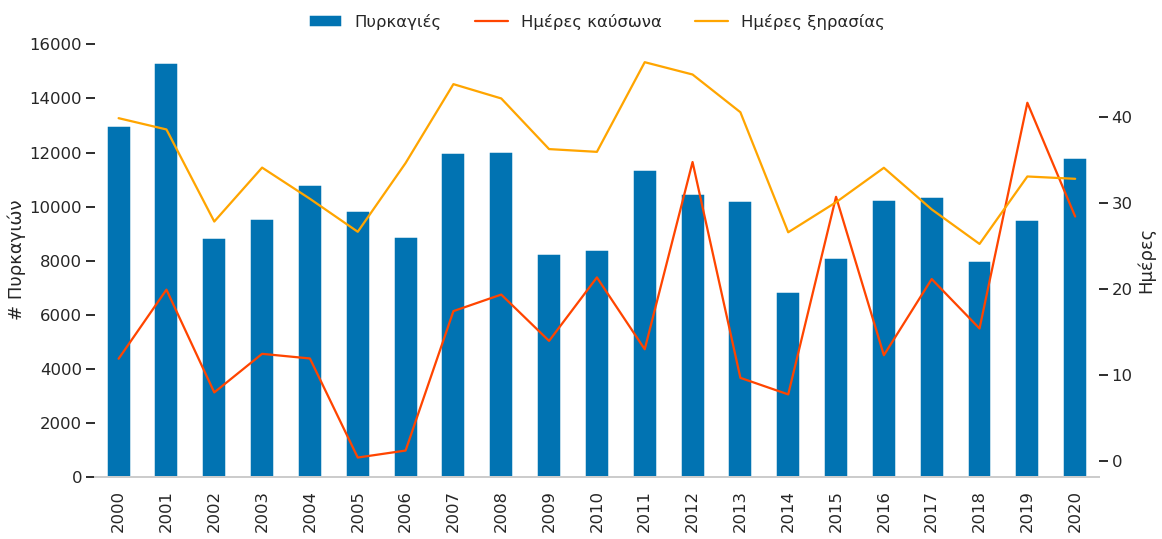

In [6]:
#| code-summary: Ραβδόγραμμα
#| column: page
#| fig-align: left
#| fig-cap: Πλήθος πυρκαγιών ανά έτος
#| code-fold: true

fig, ax = plt.subplots(figsize=(18,8))
incidents_per_year.plot(kind='bar', ax=ax, x='year', y='incidents')
incidents_per_year['warm_days'].plot(kind='line', secondary_y=True, ax=ax, color='orangered')
incidents_per_year['dry_days'].plot(kind='line', secondary_y=True, ax=ax, color='orange')

handles = ax.get_legend_handles_labels()[0] + ax.right_ax.get_legend_handles_labels()[0]
labels = ['Πυρκαγιές', 'Ημέρες καύσωνα', 'Ημέρες ξηρασίας']
ax.legend(handles, labels, loc='upper center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 1.1))

ax.grid(False)
ax.right_ax.grid(False)
ax.tick_params(axis='x', labelrotation = 90)
sns.despine(fig, top=True, left=True)
ax.set_xlabel('')
ax.set_ylabel('# Πυρκαγιών')
ax.right_ax.set_ylabel('Ημέρες');

Τα περισσότερα περιστατικά πυρκαγιών καταγράφηκαν το 2000 με 2001 με 12980 και 15303 αντίστοιχα. Καλύτερη χρονιά ήταν το 2014 με 6833 πυρκαγιές. Το πλήθος των πυρκαγιών έχει ξεκάθαρη σχέση με τις ημέρες ξηρασίας που επικρατούν το εκάστοτε έτος ενώ οι ημέρες καύσωνα φαίνεται να έχουν θετική συσχέτιση αλλά μικρότερη.

### Παρουσίαση καμμένων εκτάσεων

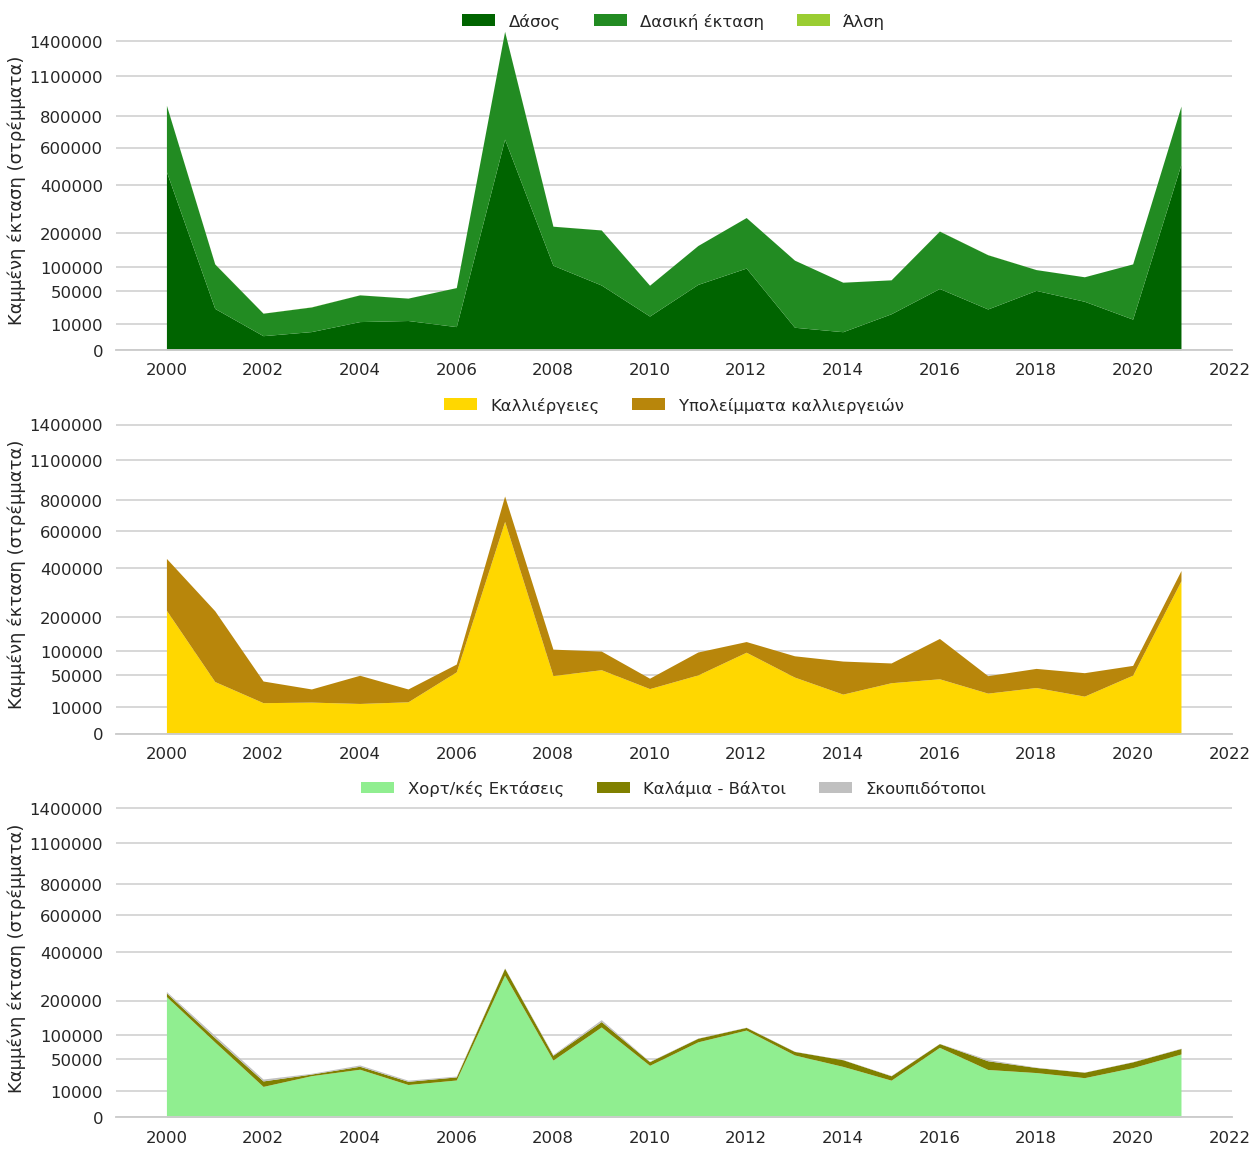

In [7]:
#| code-summary: Διάγραμμα περιοχής
#| fig-cap: "Καμμένες εκτάσεις ανά έτος (2000 - 2021)"
#| column: page
#| fig-align: left
#| code-fold: true

fig, axes = plt.subplots(3, 1, figsize=(20, 20))
wildfires.groupby(wildfires.start.dt.year).sum().plot.area(ax=axes[0],
                                                           y=['forest', 'forest_area', 'grove'],
                                                           color=['darkgreen', 'forestgreen', 'yellowgreen'],
                                                           linewidth=0)

wildfires.groupby(wildfires.start.dt.year).sum().plot.area(ax=axes[1],
                                                           y=['crop_fields', 'crop_residues'],
                                                           color=['gold', 'darkgoldenrod'],
                                                           linewidth=0)

wildfires.groupby(wildfires.start.dt.year).sum().plot.area(ax=axes[2],
                                                           y=['grassland', 'marsh', 'dumps'],
                                                           color=['lightgreen', 'olive', 'silver'],
                                                           linewidth=0)

# make a square root scale for y, otherwise should recalculate area field
def forward(x):
    return x**(1/2)


def inverse(x):
    return x**2

mylabels = [['Δάσος', 'Δασική έκταση', 'Άλση'], ['Καλλιέργειες', 'Υπολείμματα καλλιεργειών'], ['Χορτ/κές Εκτάσεις', 'Καλάμια - Βάλτοι', 'Σκουπιδότοποι']]

for i, ax in enumerate(axes):
    ax.xaxis.grid(False)
    sns.despine(ax=ax, right=True, left=True, top=True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.set_ylim([0, 1_500_000])
    ax.set_yscale('function', functions=(forward, inverse)) # set the square root scale
    ax.yaxis.set_major_locator(ticker.FixedLocator([0, 10_000, 50_000, 100_000, 200_000, 400_000,
                                                    600_000, 800_000, 1_100_000, 1_400_000]))
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.set_xlabel('')
    ax.set_ylabel('Καμμένη έκταση (στρέμματα)')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, mylabels[i], loc='upper center', frameon=False, ncol=3, bbox_to_anchor=(0.5, 1.1))

Το 2000 είχαμε την πυρκαγιά της Σάμου, τη μεγαλύτερη στην ιστορία του νησιού με 145.000 στρέμματα καμμένα όπως επίσης και του Ξυλόκαστρου Κορινθίας όπου κάηκαν συνολικά 200.000 στρέμματα.^[[<<Οι 10 πιο καταστροφικές πυρκαγιές της Ελλάδας>> https://dasarxeio.com 17/08/2017](https://dasarxeio.com/2017/08/17/47883/)]

Το 2007, η χειρότερη χρονιά για την Πελοπόννησο, με την μεγαλύτερη καταστροφή φυσικού πλούτου μέχρι σήμερα. Σε δύο μήνες, Ιούλιο και Αύγουστο ξέσπασαν πυρκαγιές στο Αίγιο, την Καλαμάτα, την Καλλιθέα Λακωνίας, την Ζαχάρω και το Αγραπιδώρι Ηλείας όπου έκαψαν άνω του ενός εκατομμυρίου στρεμμάτων.^[[<<Οι 10 πιο καταστροφικές πυρκαγιές της Ελλάδας>> https://dasarxeio.com 17/08/2017](https://dasarxeio.com/2017/08/17/47883/)]

Το 2021 ήταν σειρά της Εύβοιας να υποστεί μία από τις μεγαλύτερες καταστροφές του φυσικού της πλούτου με 511.854 καμμένα στρέμματα. Ακολούθησε η πυρκαγιά στην Αρχαία Ολυμπία με 150.000 καμμένα στρέμματα και την Ανατολική Μάνη με 101.001 καμμένα στρέμματα.^[[<<Ημερίδα για τον απολογισμό της αντιπυρικής περιόδου έτους 2021>> Πυροσβεστικό Σώμα. 14/12/2021](https://www.fireservice.gr/el_GR/-/emerida-gia-ton-apologismo-tes-antipyrikes-periodou-etous-2021)]

### Διάρκεια πυρκαγιών

'Επειτα θα υπολογίσουμε την διάρκεια των πυρκαγιών σε όσα δεδομένα έχουμε διαθέσιμη την ημερ/νία πυρόσβεσης.

In [8]:
#| code-summary: Υπολογισμός διάρκειας πυρκαγιών σε όσα δεδομένα έχουμε διαθέσιμη την ημερ/νία πυρόσβεσης
#| code-fold: true

# αφαιρούμε τις τιμές που λείπουν
wildfires_subset = wildfires[['start', 'end']].dropna()

print("Πλήθος εγγραφών για τις οποίες υπολογίσαμε την διάρκεια: ", wildfires_subset.shape[0])

wildfires_subset['duration'] = (wildfires_subset.end - wildfires_subset.start).dt.total_seconds() / 360 / 24

Πλήθος εγγραφών για τις οποίες υπολογίσαμε την διάρκεια:  201425


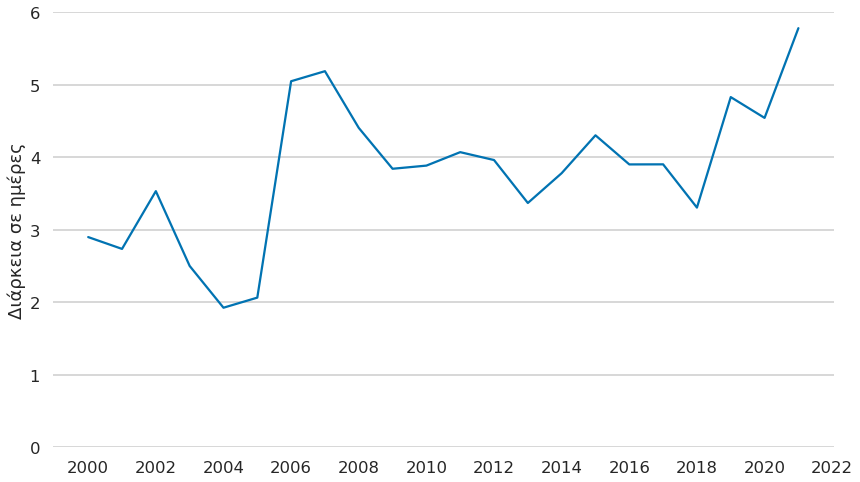

In [9]:
#| code-summary: Γραμμικό γράφημα
#| fig-cap: "Ετήσιος μέσος όρος διάρκειας πυρκαγιών (2000 - 2021)"
#| column: page
#| fig-align: left
#| code-fold: true

fig, ax = plt.subplots(figsize=(14, 8))
wildfires_subset.groupby(wildfires_subset.start.dt.year).mean().plot(y='duration', ax=ax, legend=False)

sns.despine(ax=ax, top=True, left=True, right=True, bottom=True)
ax.xaxis.grid(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_ylim([0, 6])
ax.set(xlabel='', ylabel='Διάρκεια σε ημέρες');

Με την πάροδο των ετών η διάρκεια των πυρκαγιών αυξάνεται με αποκορύφωμα το 2021. Επίσης με μία σύγκριση με το προηγούμενο γράφημα υπάρχει σαφής συσχέτιση της διάρκειας με την έκταση των καταστροφών.

### Παρουσίαση του έμψυχου δυναμικού πυρόσβεσης και των οχημάτων

In [10]:
#| code-summary: Επιλογή των ετών 2011-2021 για την παρουσίαση του ανθρώπινου δυναμικού και των οχημάτων πυρόσβεσης
#| code-fold: true

wildfires_subset = wildfires[wildfires.start.dt.year >= 2011]

In [11]:
#| code-summary: Υπολογισμός του μέσου όρου πυροσβεστών ανά περιστατικό
#| code-fold: true

personnel = wildfires_subset.groupby(wildfires_subset.start.dt.year).mean()[['firemen',
                                                                             'patrol',
                                                                             'volunteers',
                                                                             'military',
                                                                             'other_groups']]

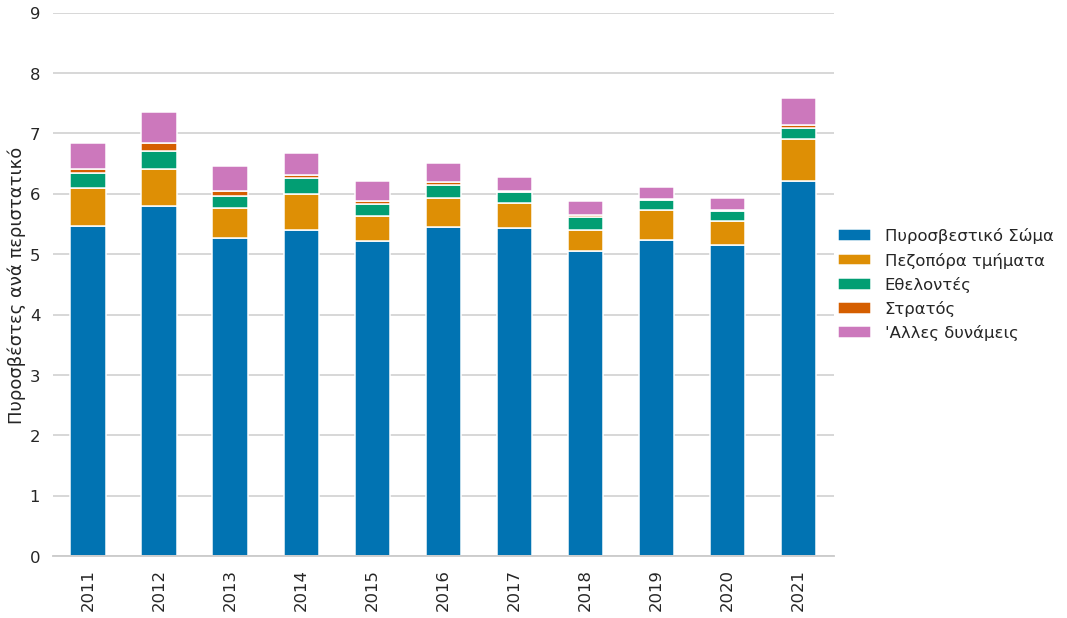

In [12]:
#| code-summary: Ραβδόγραμμα
#| fig-cap: "Μέσος όρος πυροσβεστών ανά περιστατικό ετησίος (2011-2021)"
#| column: page
#| fig-align: left
#| code-fold: true

fig, ax = plt.subplots(figsize=(14, 10))
personnel.plot.bar(stacked=True, ax=ax)
sns.despine(ax=ax, top=True, left=True, right=True)

ax.xaxis.grid(False)
ax.set_ylim([0, 9])

handles, _ = ax.get_legend_handles_labels()
labels = ['Πυροσβεστικό Σώμα', 'Πεζοπόρα τμήματα', 'Εθελοντές', 'Στρατός', "'Αλλες δυνάμεις"]
ax.legend(handles, labels, loc='right', bbox_to_anchor=(1.3,0.5), frameon=False)
ax.set(xlabel='', ylabel='Πυροσβέστες ανά περιστατικό');

Ο μέσος όρος των πυροσβεστών που επιχειρούν ανά περιστατικό ετησίως είναι σχετικά σταθερός. Ακόμη και το 2012 και 2021 που επιχείρησαν κατά μέσο όρο περισσότεροι πυροσβέστες οι καταστροφές ήταν εκτεταμένες όπως είδαμε από τα προηγούμενα γραφήματα.

In [13]:
#| code-summary: Υπολογισμός του μέσου όρου οχημάτων ανά περιστατικό
#| code-fold: true

vehicles = wildfires_subset.groupby(wildfires_subset.start.dt.year).mean()[
                                                                       ['fire_trucks',
                                                                        'local_authorities',
                                                                        'private_trucks',
                                                                        'other_trucks',
                                                                        'helicopters',
                                                                        'canadair_new',
                                                                        'canadair_old',
                                                                        'pzl',
                                                                        'gru']
                                                                            ]

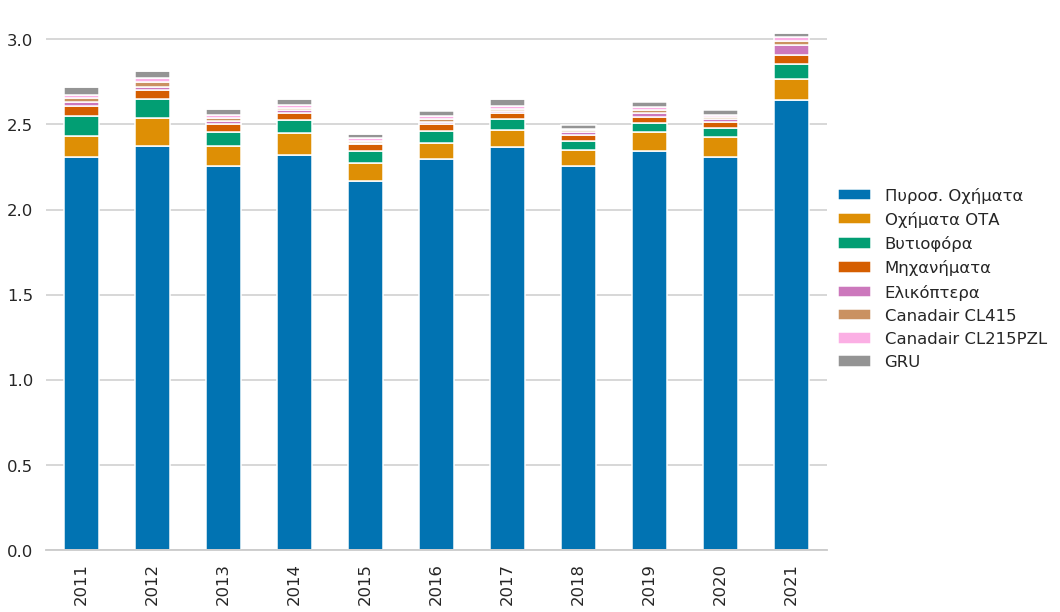

In [14]:
#| code-summary: Ραβδόγραμμα
#| fig-cap: "Μέσος όρος οχημάτων ανά περιστατικό ετησίος (2011-2021)"
#| column: page
#| fig-align: left
#| code-fold: true

fig, ax = plt.subplots(figsize=(14, 10))
vehicles.plot.bar(stacked=True, ax=ax)

ax.xaxis.grid(False)
sns.despine(ax=ax, top=True, left=True, right=True)

handles, _ = ax.get_legend_handles_labels()
labels = ['Πυροσ. Οχήματα', 'Οχήματα ΟΤΑ', 'Βυτιοφόρα', 'Μηχανήματα', 'Ελικόπτερα', 'Canadair CL415', 'Canadair CL215' 'PZL', 'GRU']
ax.legend(handles, labels, loc='right', bbox_to_anchor=(1.3,0.5), frameon=False)
ax.set_xlabel('');

Ακριβώς ίδια είναι η εικόνα από το μέσο όρο οχημάτων που χρησιμοποιήθηκαν στην πυρόσβεση ανά έτος.

### Συμπεράσματα

Δυστυχώς παρόλες τις προσπάθειες πυρόσβεσης δεν εμφανίζεται κάποια βελτίωση στην ετήσια αποτίμηση των ζημιών από πυρκαγιές. Αν συνυπολογίσουμε ότι οι καιρικές συνθήκες όπως ο καύσωνας και η ξηρασία επιδεινώνουν την κατάσταση και λόγω της κλιματικής αλλαγής τέτοιες συνθήκες θα είναι συχνότερες, πρέπει να αναμένουμε ότι τα επόμενα χρόνια η συχνότητα, η διάρκεια και η έκταση των ζημιών θα αυξάνονται. Ανάλογα λοιπόν, θα πρέπει να αυξήσουμε την προσπάθεια πυρόσβεσης ποιοτικά και ποσοτικά, όπως επίσης και τις προσπάθεις πρόληψης, αν θέλουμε μελλοντικά να διατηρήσουμε ή ακόμη και να μειώσουμε το ετήσιο κόστος ζημιών από πυρκαγιές.